1. Handling Missing Data in Titanic Dataset
   - Task:Identify and handle missing values in the Titanic dataset. Experiment with different strategies such as mean/median imputation, mode imputation, and dropping rows/columns.
   - Dataset: Titanic Dataset


In [65]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
df=df.drop('Name', axis=1)
df=df.drop('Cabin', axis=1)
df=df.drop('PassengerId', axis=1)
df=df.drop('Ticket', axis=1)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [67]:


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


In [68]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



In [69]:
missing_values = df.isnull().sum()
print(missing_values)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


2. Encoding Categorical Variables in a Car Evaluation Dataset
   - Task: Encode categorical variables in the Car Evaluation dataset using one-hot encoding and label encoding. Compare the results.
   - Dataset: Car Evaluation Dataset


In [70]:
import pandas as pd

df = pd.read_csv('car_evaluation.csv')
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [71]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
drop_columns= df.drop(columns=categorical_columns)
df_encoded = pd.concat([drop_columns, encoded_df], axis=1)

df_encoded

,vhigh_low,vhigh_med,vhigh_vhigh,vhigh.1_low,vhigh.1_med,vhigh.1_vhigh,2_3,2_4,2_5more,2.1_4,2.1_more,small_med,small_small,low_low,low_med,unacc_good,unacc_unacc,unacc_vgood
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1723,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1724,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1725,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [72]:
from sklearn.preprocessing import LabelEncoder
# label_encoder=label_encoder()
df['vhigh'] = label_encoder.fit_transform(df['vhigh'])
df['vhigh.1'] = label_encoder.fit_transform(df['vhigh.1'])
df['two'] = label_encoder.fit_transform(df['2'])
df['two.1'] = label_encoder.fit_transform(df['2.1'])

df['small'] = label_encoder.fit_transform(df['small'])
df['low'] = label_encoder.fit_transform(df['low'])
df['unacc'] = label_encoder.fit_transform(df['unacc'])
df


,vhigh,vhigh.1,2,2.1,small,low,unacc,two,two.1
0,3,3,2,2,2,2,2,0,0
1,3,3,2,2,2,0,2,0,0
2,3,3,2,2,1,1,2,0,0
3,3,3,2,2,1,2,2,0,0
4,3,3,2,2,1,0,2,0,0
...,...,...,...,...,...,...,...,...,...
1722,1,1,5more,more,1,2,1,3,2
1723,1,1,5more,more,1,0,3,3,2
1724,1,1,5more,more,0,1,2,3,2
1725,1,1,5more,more,0,2,1,3,2


In [73]:
print("Shape of One-Hot Encoded DataFrame:", df_encoded.shape)
print("Shape of Label Encoded DataFrame:", df.shape)

Shape of One-Hot Encoded DataFrame: (1727, 18)
Shape of Label Encoded DataFrame: (1727, 9)


3. Scaling Features in the Wine Quality Dataset
   - Task: Apply normalization and standardization to the features in the Wine Quality dataset. Analyze how scaling affects the distribution of data.
   - Dataset: Wine Quality Dataset


In [74]:
import pandas as pd
df=pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [75]:
from sklearn.preprocessing import MinMaxScaler
# normalization
features = df.drop(columns=['quality'])

normalization = MinMaxScaler()
normalized_features = normalization.fit_transform(features)
normalized_features = pd.DataFrame(normalized_features, columns=features.columns)
normalized_features


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.000000
1,0.283186,0.520548,0.00,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385,0.000626
2,0.283186,0.438356,0.04,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385,0.001252
3,0.584071,0.109589,0.56,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385,0.001879
4,0.247788,0.397260,0.00,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846,0.002505
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.150442,0.267123,0.13,0.095890,0.106845,0.417910,0.120141,0.416300,0.535433,0.251497,0.400000,0.996869
1139,0.194690,0.342466,0.08,0.068493,0.093489,0.402985,0.113074,0.472834,0.535433,0.293413,0.169231,0.997495
1140,0.141593,0.328767,0.08,0.075342,0.130217,0.462687,0.134276,0.354626,0.559055,0.149701,0.323077,0.998121
1141,0.115044,0.294521,0.10,0.089041,0.083472,0.567164,0.159011,0.370778,0.614173,0.257485,0.430769,0.998748


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)
standardized_features = pd.DataFrame(standardized_features, columns=features.columns)

standardized_features

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-1.735618
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,-1.733462
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,-1.731306
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601,-1.729150
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,-1.726993
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.151292,-0.118842,-0.703785,-0.171289,-0.231395,1.306316,-0.180503,-0.514707,0.695966,0.541862,0.515741,1.696940
1139,-0.865059,0.493785,-0.958109,-0.466421,-0.400719,1.208717,-0.241539,-0.114545,0.695966,0.952843,-0.870937,1.699096
1140,-1.208538,0.382399,-0.958109,-0.392638,0.064922,1.599113,-0.058432,-0.951246,0.887542,-0.456235,0.053515,1.701252
1141,-1.380278,0.103932,-0.856379,-0.245072,-0.527712,2.282306,0.155192,-0.836914,1.334554,0.600574,0.700632,1.703408


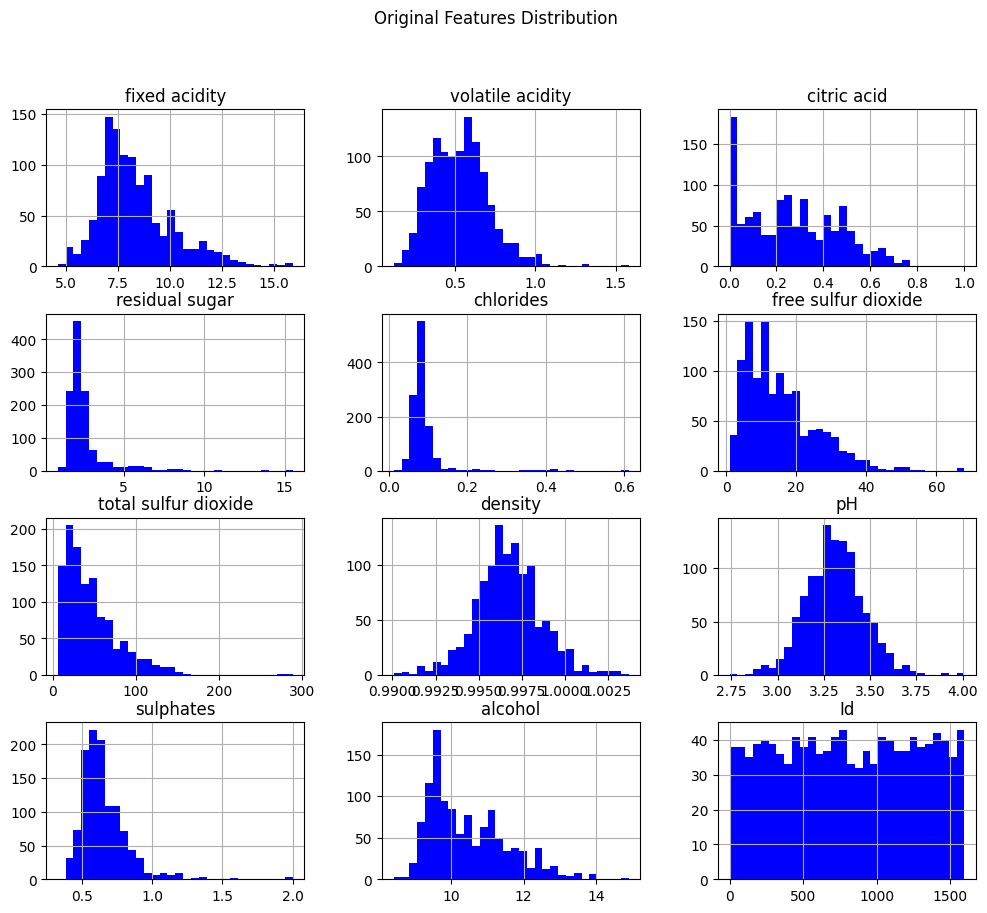

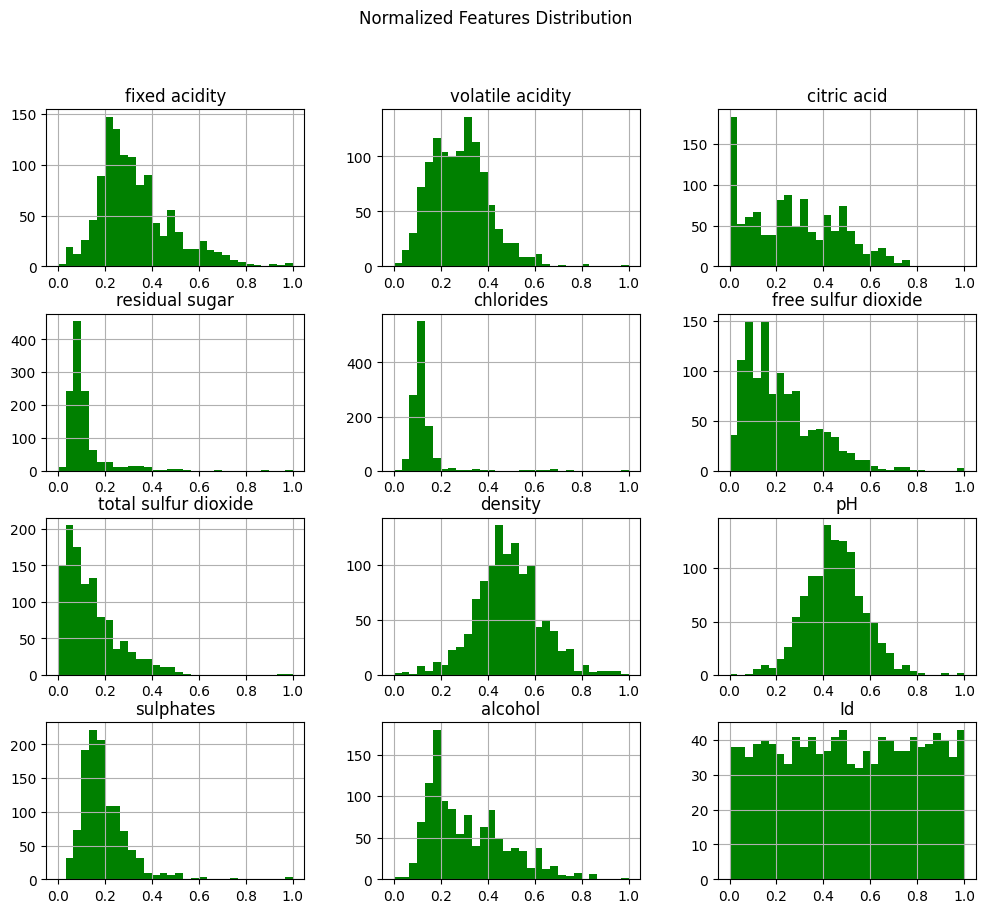

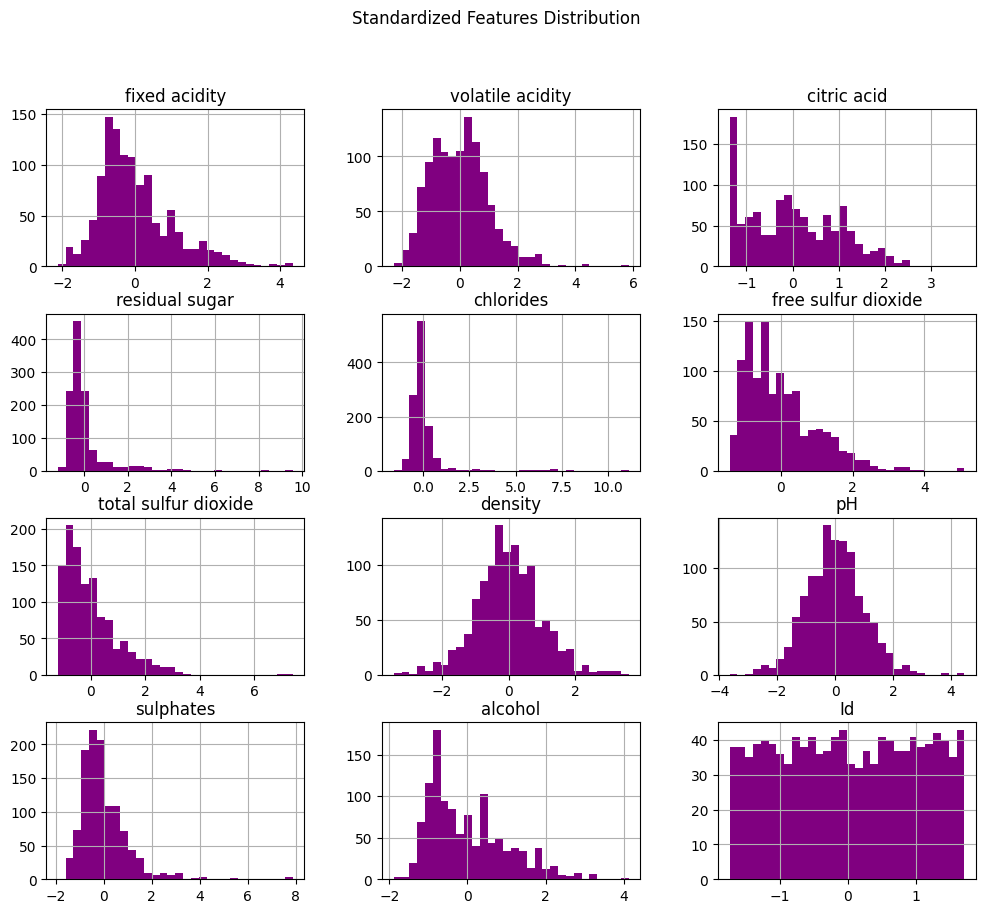

In [77]:
import matplotlib.pyplot as plt

features.hist(bins=30, figsize=(12, 10), color='blue')
plt.suptitle('Original Features Distribution')
plt.show()

normalized_features.hist(bins=30, figsize=(12, 10), color='green')
plt.suptitle('Normalized Features Distribution')
plt.show()

standardized_features.hist(bins=30, figsize=(12, 10), color='purple')
plt.suptitle('Standardized Features Distribution')
plt.show()


4. Handling Outliers in the Boston Housing Dataset
   - Task: Identify and handle outliers in the Boston Housing dataset using techniques like Z-score, IQR, and visualization methods.
   - Dataset: Boston Housing Dataset


In [78]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

df=pd.read_csv('HousingData.csv')


z_scores = zscore(df)
threshold = 3
outliers_z_score = (z_scores.abs() > threshold).sum()
print("Number of outliers per column based on Z-score: ")
print(outliers_z_score)


Number of outliers per column based on Z-score: 
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          8
AGE         0
DIS         5
RAD         0
TAX         0
PTRATIO     0
B          25
LSTAT       0
MEDV        0
dtype: int64


In [79]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
# print("IQR= ", IQR)

lowerBound = q1 - 1.5 * IQR
upperBound = q3 + 1.5 * IQR
df = df[~((df < lowerBound) | (df > upperBound)).any(axis=1)]

print("DataFrame after removing outliers:", df)

DataFrame after removing outliers:         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  39

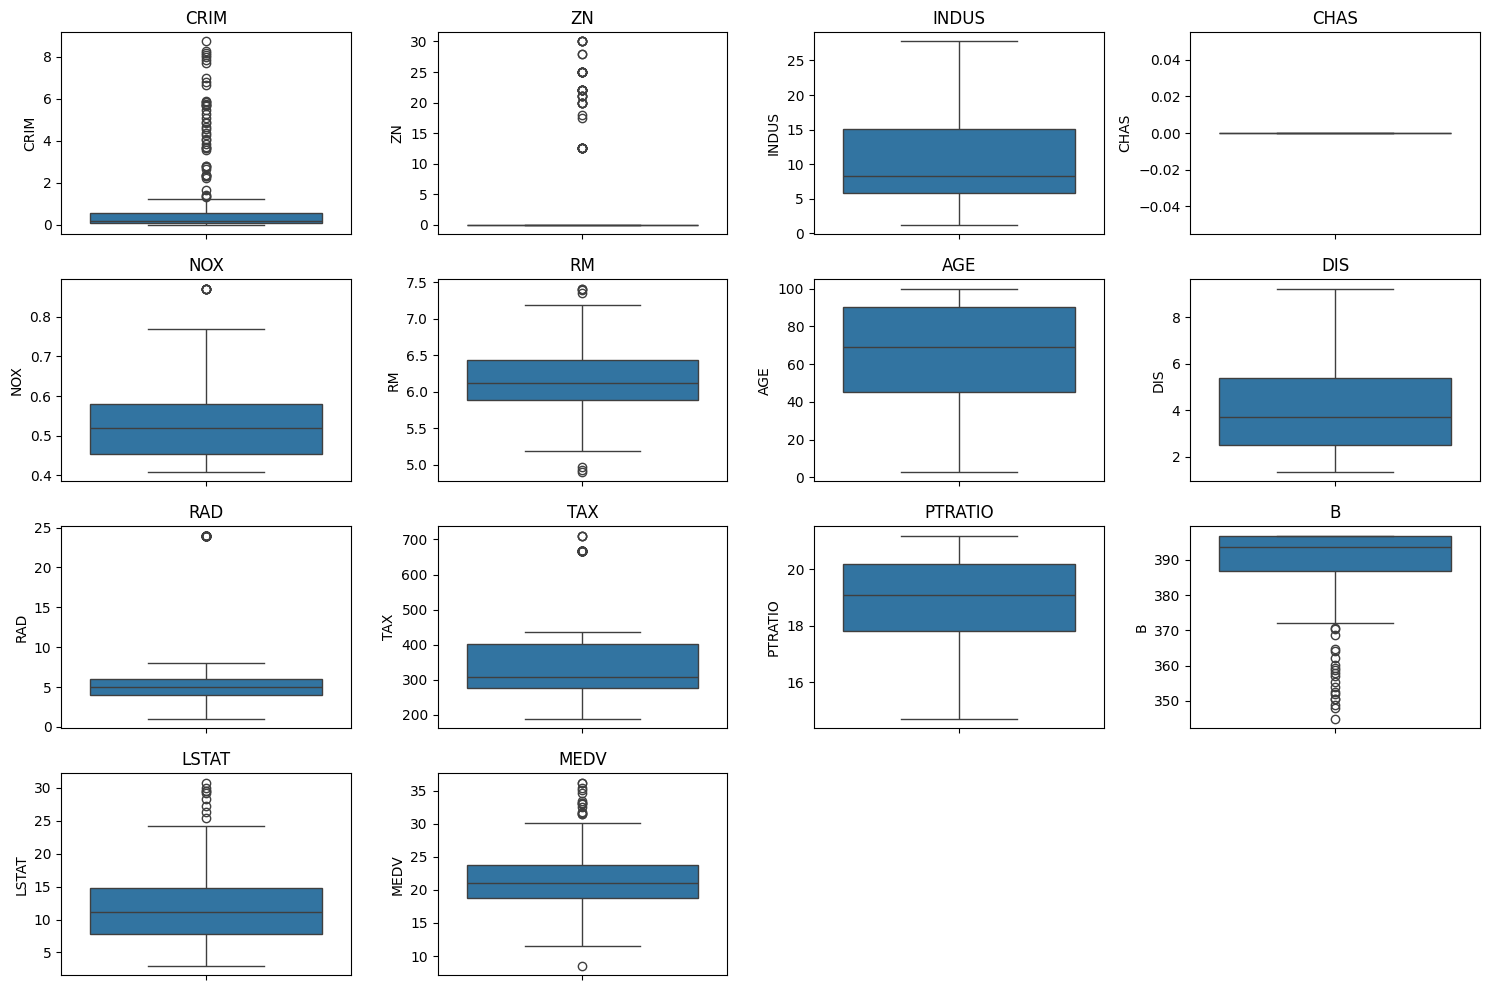

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, column in enumerate(df, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


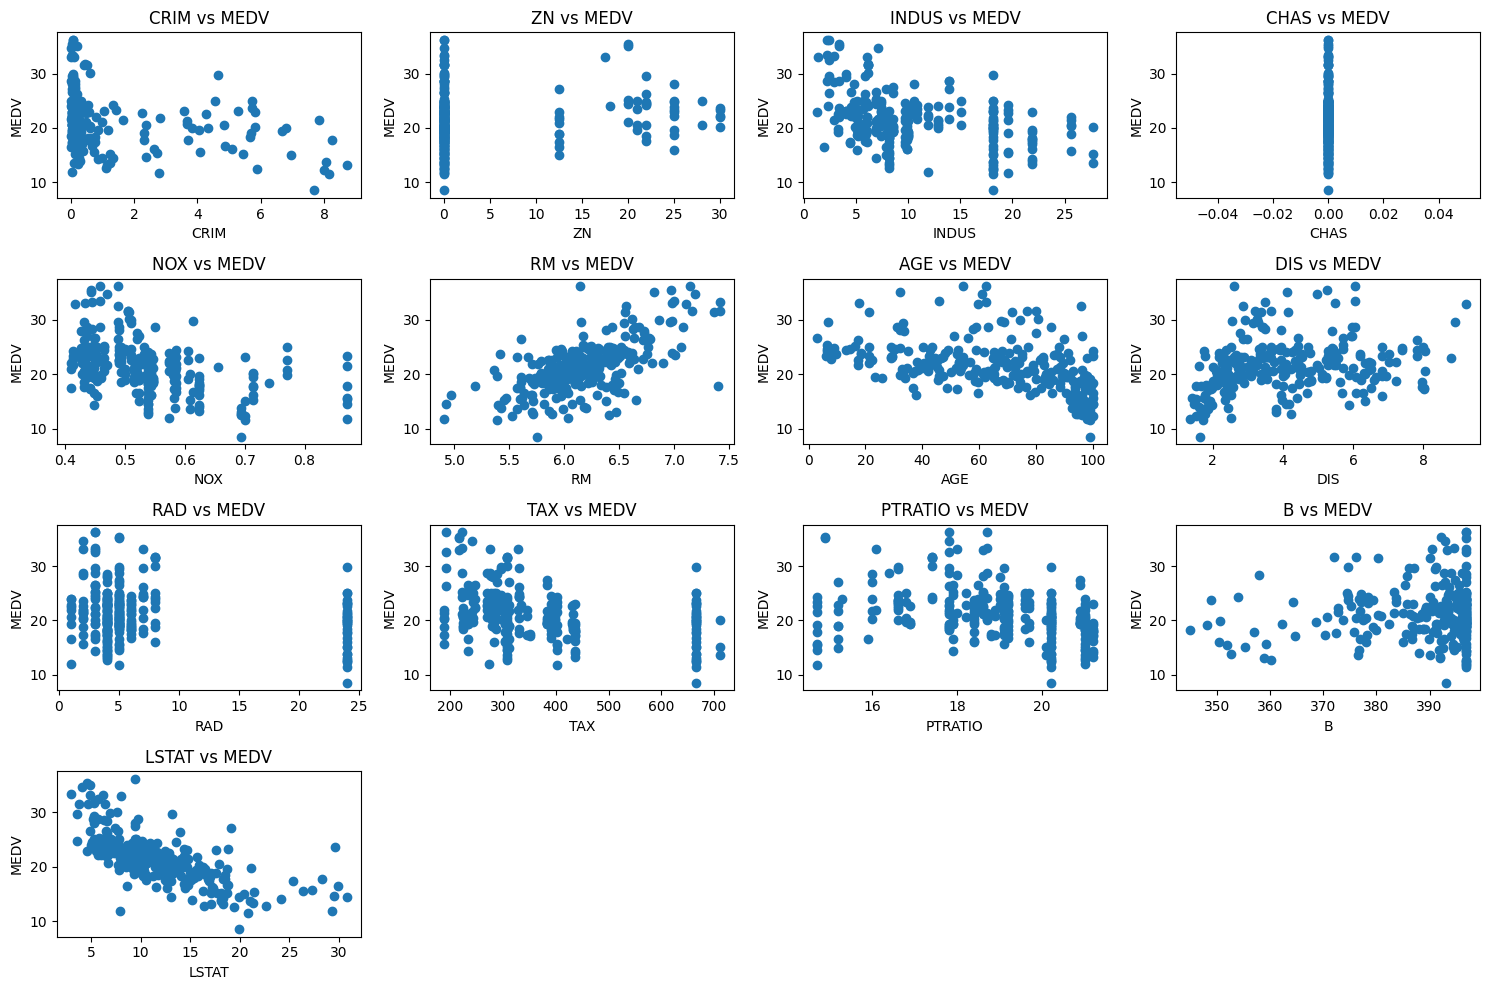

In [81]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df, 1):
    if column != 'MEDV': 
        plt.subplot(4, 4, i)  
        plt.scatter(df[column], df['MEDV'])  
        plt.xlabel(column)
        plt.ylabel('MEDV')  
        plt.title(f'{column} vs MEDV')
plt.tight_layout()
plt.show()


5. Data Imputation in the Retail Sales Dataset
   - Task: Handle missing values in the Retail Sales dataset using advanced imputation techniques like KNN imputation and MICE.
   - Dataset: Retail Sales Dataset


In [82]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df=pd.read_csv('retail_sales_dataset.csv')
# numericdata=df.numeric()
numericData = df.select_dtypes(include=['number'])


In [83]:
knnImputer = KNNImputer(n_neighbors=3)
knnData = pd.DataFrame(knnImputer.fit_transform(numericData), columns=numericData.columns)
print("Data after KNN imputation: ", knnData.head())

Data after KNN imputation:     Transaction ID   Age  Quantity  Price per Unit  Total Amount
0             1.0  34.0       3.0            50.0         150.0
1             2.0  26.0       2.0           500.0        1000.0
2             3.0  50.0       1.0            30.0          30.0
3             4.0  37.0       1.0           500.0         500.0
4             5.0  30.0       2.0            50.0         100.0


In [84]:
miceImputer = IterativeImputer()
miceDataframe = pd.DataFrame(miceImputer.fit_transform(numericData), columns=numericData.columns)
print("Data after MICE imputation: ", miceDataframe.head())

Data after MICE imputation:     Transaction ID   Age  Quantity  Price per Unit  Total Amount
0             1.0  34.0       3.0            50.0         150.0
1             2.0  26.0       2.0           500.0        1000.0
2             3.0  50.0       1.0            30.0          30.0
3             4.0  37.0       1.0           500.0         500.0
4             5.0  30.0       2.0            50.0         100.0


6. Feature Engineering in the Heart Disease Dataset
   - Task: Create new features from existing ones in the Heart Disease dataset, such as age groups, cholesterol levels, and more.
   - Dataset: Heart Disease Dataset


In [85]:
import pandas as pd
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [86]:

def categorize_age(age):
    if age < 20:
        return '<20'
    elif 20 <= age < 40:
        return '20-39'
    elif 40 <= age < 60:
        return '40-59'
    elif 60 <= age < 80:
        return '60-79'
    else:
        return '80+'

df['age group'] = df['age'].apply(categorize_age)

In [87]:
def categorize_chol(chol):
    if chol <= 200:
        return 'Normal'
    elif 200 < chol <= 240:
        return 'Borderline'
    else:
        return 'High'

df['cholesterol level'] = df['chol'].apply(categorize_chol)



In [88]:
if 'height' in df.columns and 'weight' in df.columns:
    df['BMI'] = df['weight'] / (df['height'] / 100) ** 2

print("DataFrame with new features: ", df)

DataFrame with new features:        age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target age group chole

7. Transforming Variables in the Bike Sharing Dataset
   - Task: Apply transformations like log, square root, and Box-Cox transformations to skewed variables in the Bike Sharing dataset.
   - Dataset: Bike Sharing Dataset


In [89]:
import pandas as pd
import numpy as np
from scipy import stats

dayData = pd.read_csv("day.csv")
hourData = pd.read_csv("hour.csv")
dayData.dropna()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [90]:
hourData.dropna()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [91]:
print("Day DataFrame: ", dayData.head())


Day DataFrame:     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [92]:
print("Hour DataFrame: ", hourData.head())

Hour DataFrame:     instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [93]:
def apply_transformations(df, column):
    if column in df.columns:
        df[f'{column}_log'] = np.log1p(df[column])
        df[f'{column}_sqrt'] = np.sqrt(df[column])
        df[f'{column}_boxcox'], _ = stats.boxcox(df[column] + 1)
    return df
dayTransformed = apply_transformations(dayData, 'count')
print("Transformed Day DataFrame:  ", dayTransformed.head())


Transformed Day DataFrame:      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [94]:

hourTransformed = apply_transformations(hourData, 'count')
print("Transformed Hour DataFrame: ", hourTransformed.head())



Transformed Hour DataFrame:     instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [95]:
combinedData = pd.concat([dayTransformed, hourTransformed], axis=0, ignore_index=True)
print(" Combined DataFrame: ", combinedData.head())

 Combined DataFrame:     instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  hr  
0   985 NaN  
1   801 NaN  
2  1349 NaN  
3  1562 

8. Feature Selection in the Diabetes Dataset
   - Task: Use techniques like correlation analysis, mutual information, and recursive feature elimination (RFE) to select important features in the Diabetes dataset.
   - Dataset: Diabetes Dataset


In [96]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [97]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [98]:
corr= df.corr()

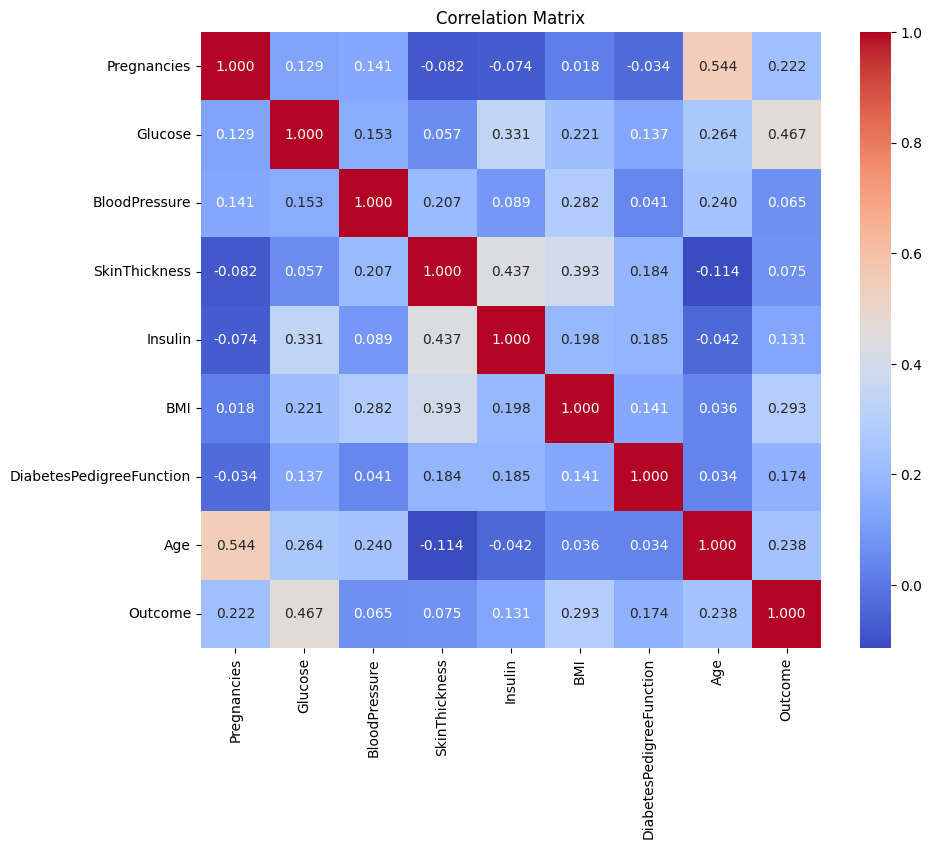

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Matrix")
plt.show()  

In [100]:
X=df.drop(columns='Outcome')
y=df['Outcome']

In [101]:
from sklearn.feature_selection import mutual_info_classif
mutual_info= mutual_info_classif(X,y)
mutual_info

array([0.02467433, 0.11304026, 0.00598189, 0.        , 0.04679352,
       0.07286734, 0.01058161, 0.04599331])

In [102]:
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter = 1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [103]:
features = X.columns[rfe.support_]
features

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

9. Dealing with Imbalanced Data in the Credit Card Fraud Detection Dataset
   - Task: Handle imbalanced data in the Credit Card Fraud Detection dataset using techniques like SMOTE, ADASYN, and undersampling.
   - Dataset: Credit Card Fraud Detection Dataset


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

df= pd.read_csv('creditcard.csv')

In [105]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
scaler = StandardScaler()
X_trainScaled = scaler.fit_transform(X_train)
X_testScaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)


In [107]:
#SMOTE
smote = SMOTE(random_state=42)
Xsmote, y_smote = smote.fit_resample(X_trainScaled, y_train)
print("After SMOTE: ", pd.Series(y_smote).value_counts())
model.fit(Xsmote, y_smote)
yPredsmote = model.predict(X_testScaled)
print("Classification Report with SMOTE: ", classification_report(y_test, yPredsmote))

After SMOTE:  Class
0    199008
1    199008
Name: count, dtype: int64
Classification Report with SMOTE:                precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [108]:
#ADASYN
adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X_trainScaled, y_train)
print("After ADASYN: ", pd.Series(y_adasyn).value_counts())
model.fit(X_adasyn, y_adasyn)
y_pred_adasyn = model.predict(X_testScaled)
print("Classification Report with ADASYN: ", classification_report(y_test, y_pred_adasyn))

After ADASYN:  Class
1    199036
0    199008
Name: count, dtype: int64
Classification Report with ADASYN:                precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.02      0.96      0.03       136

    accuracy                           0.90     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.90      0.95     85443



In [109]:
#Undersampling
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X_trainScaled, y_train)
print("After Undersampling: ", pd.Series(y_under).value_counts())
model.fit(X_under, y_under)
y_pred_under = model.predict(X_testScaled)
print("Classification Report with Undersampling: ", classification_report(y_test, y_pred_under))

After Undersampling:  Class
0    356
1    356
Name: count, dtype: int64
Classification Report with Undersampling:                precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.04      0.93      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.96      0.98     85443



10. Combining Multiple Datasets in the Movie Lens Dataset
    - Task: Combine and preprocess multiple related datasets from the Movie Lens dataset, such as ratings, user information, and movie metadata.
    - Dataset: Movie Lens Dataset


In [110]:
import pandas as pd

ratings = pd.read_csv('rating.csv')
movies = pd.read_csv('movie.csv')
tags = pd.read_csv('tag.csv')

In [111]:

tags.dropna()
ratings.dropna()
movies.dropna()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [112]:
ratings_movies = pd.merge(ratings.head(), movies.head(), on='movieId', how='left')

combined_datasets = pd.merge(ratings_movies.head(), tags.head(), on='userId', how='left')
combined_datasets.dropna()


print("Combined Dataset: ")
combined_datasets.head()

Combined Dataset: 


,userId,movieId_x,rating,timestamp_x,title,genres,movieId_y,tag,timestamp_y
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,NaN
1,1,29,3.5,2005-04-02 23:31:16,NaN,NaN,NaN,NaN,NaN
2,1,32,3.5,2005-04-02 23:33:39,NaN,NaN,NaN,NaN,NaN
3,1,47,3.5,2005-04-02 23:32:07,NaN,NaN,NaN,NaN,NaN
4,1,50,3.5,2005-04-02 23:29:40,NaN,NaN,NaN,NaN,NaN
